In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=10)

In [3]:
print(X.shape, Y.shape)

(500, 2) (500,)


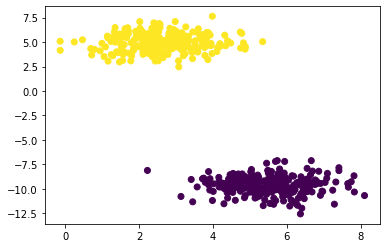

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def predict(X, W):
    z = np.dot(X, W)
    return sigmoid(z)

In [8]:
def loss(X, Y, W):
    """binary cross entropy"""
    Y_ = predict(X, W)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

In [9]:
def updateW(X, Y, W, learning_rate):
    Y_ = predict(X, W)
    grad = np.dot(X.T, Y_ - Y)
    
    m = X.shape[0]
    W = W - learning_rate*grad/float(m)
    
    return W

In [10]:
def train(X, Y, learning_rate = 0.5, epochs = 500):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    
    W  = np.zeros((X.shape[1])) ## n+1 entries
    
    for i in range(epochs):
        W = updateW(X, Y, W, learning_rate)
        
        if epochs%10 == 0:
            l = loss(X, Y, W)
            print("epoch %d loss is %.4f"%(i, l), end='\r')
    
    return W

In [11]:
W = train(X, Y)

In [17]:
def perceptron(X_test, W, labels = True):
    if X_test.shape[1] != W.shape[0]:
        ones = np.ones((X_test.shape[0], 1))
        X_test = np.hstack((ones, X_test))
        
    probs = predict(X_test, W)
    
    if not labels:
        return probs
    else:
        labels = np.zeros((X_test.shape[0]))
        labels[prob>0.5] = 1
        return labels

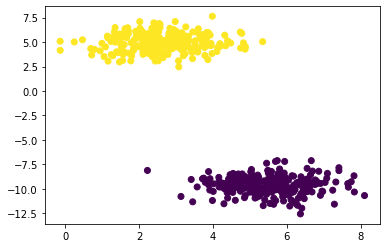

In [18]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [19]:
x1 = np.linspace(0, 8, 10)
x2 = -(W[0] + W[1]*x1)/W[2]

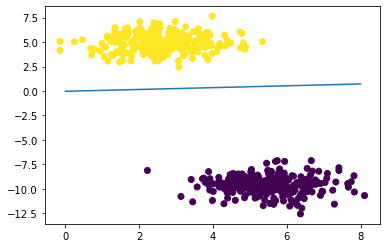

In [20]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot(x1, x2)
plt.show()